<a href="https://colab.research.google.com/github/arbhavana/Sentimental-analysis-of-code-mixed-Telugu-English-text/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install symspellpy
import pkg_resources #for working with files
from symspellpy import SymSpell, Verbosity  #spelling correction
import re #regular expression
# '''The "re" module stands for "regular expressions," and it provides functions for working with regular expressions in Python.
#  Regular expressions are powerful tools for pattern matching and text manipulation. You can use the "re" module to search strings,
# replace substrings, and perform various other operations based on patterns defined by regular expressions.'''


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
def elongation_normalization(text):
  text = text.lower()
  text = re.sub(r'(.)\1{2,}', r"\1\1", text)
  return text
example = "hellooo bagundhiiiiiii, gooood"
elongation_normalization(example)


'helloo bagundhii, good'

In [ ]:
#SymSpell is a Python library designed to perform efficient spelling correction and fuzzy string matching.
sym_spell = SymSpell(max_dictionary_edit_distance=4)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
def eng_spelling_correction(text):
  result = sym_spell.word_segmentation(text)
  return result.corrected_string
example = "thsi isa a lovely movei"
eng_spelling_correction(example)

'this is a lovely movie'

In [ ]:
def transliteration_normalization(text):
  text = re.sub(r'(.)\1{1,}', r"\1", text)
  return text
example = "tinnaavaa sarigga"
transliteration_normalization(example)

'tinava sariga'

In [ ]:
def consonant_normalization(text):

  text = text.replace('kh', 'k')
  text = text.replace('chh', 'ch')
  text = text.replace('gh', 'g')
  text = text.replace('th', 't')
  text = text.replace('jh', 'j')
  text = text.replace('dh', 'd')
  text = text.replace('bh', 'b')
  return text
example = "thinnava jharkand"
consonant_normalization(example)

'tinnava jarkand'

In [ ]:
def data_normalization(text_tuple):
  text = ""
  for tupl in text_tuple:
    word = tupl[0]
    lang = tupl[1]
    word = elongation_normalization(word)
    # for both languages
    if lang == 'en': #english words
      word = eng_spelling_correction(word)
      text += word + " "
    if lang == 'te': # telugu words
      word = transliteration_normalization(word)
      word = consonant_normalization(word)
      text += word + " "
    if lang == 'univ': # universal
      text += word + " "
  return text
example = [('worstttt', 'en'), ('government', 'en'), ('.', 'univ'), ('#YSRCP', 'univ'),
     ('chala', 'te'), ('chethha', 'te'), ('ga', 'te'), ('paripalana', 'te'), ('chesthumdhi', 'te'), ('.', 'univ')]
data_normalization(example)

'worst government . #ysrcp chala cheta ga paripalana chestumdi . '

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/34k_Code_Mixed_Tel-Eng.csv')
data.head()

,comment,label
0,2 5 5 routine revenge story engaging screen pl...,-1
1,attlakada mana pani manam chedam inka force ok...,0
2,1 time watch entra movie good,1
3,covid time lo choose vaalu like esesukondi,0
4,puneethraj70 ya character wise rgv chala bette...,1


In [ ]:
num_rows = len(data)

# Print the number of rows
print("Number of rows:", num_rows)

Number of rows: 34588


In [ ]:
# Assuming `data` is your DataFrame and 'label' is the column containing the labels
# Replace the labels -1, 0, 1 with 0, 1, 2 respectively
data['label'] = data['label'].replace({-1: 0, 0: 1, 1: 2})

# Verify the changes
print(data['label'].unique())

[0 1 2]


In [ ]:
# Get the list of column names
columns = data.columns

# Print the list of column names
print(columns)

Index(['comment', 'label'], dtype='object')


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop words
stop_words = set(stopwords.words('english'))
#print(stop_words)
# removing words like no,not,didn`t..etc from stop words
black_list = set(word for word in stop_words if 'no' in word or "'t" in word)
print(black_list)
stop_words = stop_words - black_list

{"won't", "isn't", "mightn't", 'nor', "mustn't", "shan't", "aren't", 'no', "wasn't", "doesn't", "wouldn't", "needn't", "hasn't", "don't", 'now', "couldn't", "didn't", 'not', "hadn't", "shouldn't", "weren't", "haven't"}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import LSTM, Bidirectional

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

2.17.0


In [ ]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=30

tokenizer = Tokenizer(num_words=vocab_size, oov_token="", lower=True)
binarizer = LabelBinarizer()

In [ ]:

data.fillna('', inplace=True)
labels = data.label.tolist()
sentences = data.comment.tolist()
_= tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences[0])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)
x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_train_true = y_train.copy()
y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
print(x_train[0])
y_test = binarizer.fit_transform(y_test)

[83, 213, 213, 917, 3367, 65, 1, 395, 434, 669, 1]
[  1   1   1 537   1   1 651 368   1   1   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]


In [ ]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))

    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

In [ ]:
# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()
    f1 = metrics.f1_score(y_test_true, y_test_preds, average='macro')
    return f1

In [ ]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))

    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    #The metrics argument should be passed as a list
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
    return model

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


217/217 ━━━━━━━━━━━━━━━━━━━━ 93s 409ms/step - accuracy: 0.5727 - loss: 0.9107 - val_accuracy: 0.7653 - val_loss: 0.5998
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 83s 383ms/step - accuracy: 0.7936 - loss: 0.5385 - val_accuracy: 0.7872 - val_loss: 0.5503
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 77s 355ms/step - accuracy: 0.8398 - loss: 0.4277 - val_accuracy: 0.7882 - val_loss: 0.5794
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 85s 369ms/step - accuracy: 0.8700 - loss: 0.3543 - val_accuracy: 0.7719 - val_loss: 0.6656
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 78s 352ms/step - accuracy: 0.8937 - loss: 0.2944 - val_accuracy: 0.7615 - val_loss: 0.7436


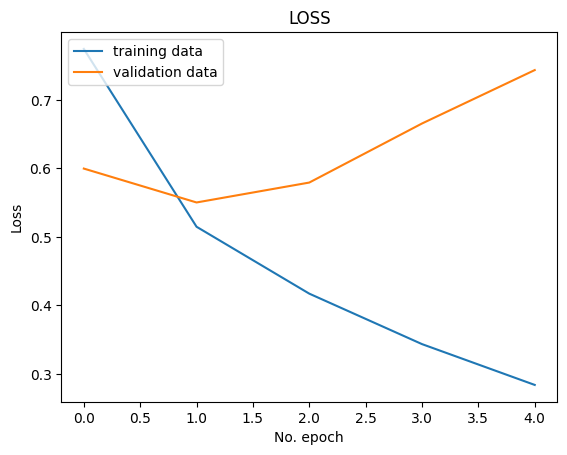

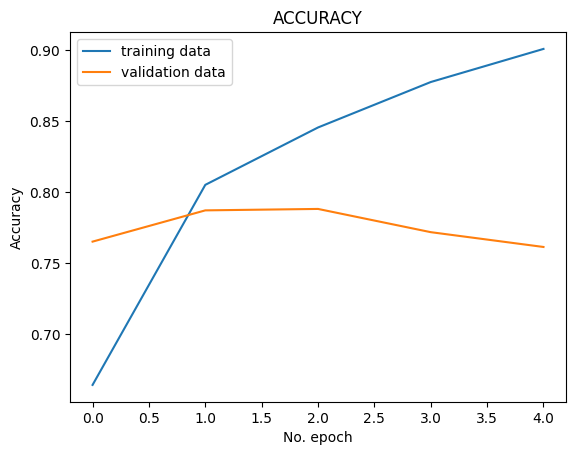

217/217 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2517
           1       0.74      0.78      0.76      2189
           2       0.80      0.73      0.76      2212

    accuracy                           0.76      6918
   macro avg       0.76      0.76      0.76      6918
weighted avg       0.76      0.76      0.76      6918



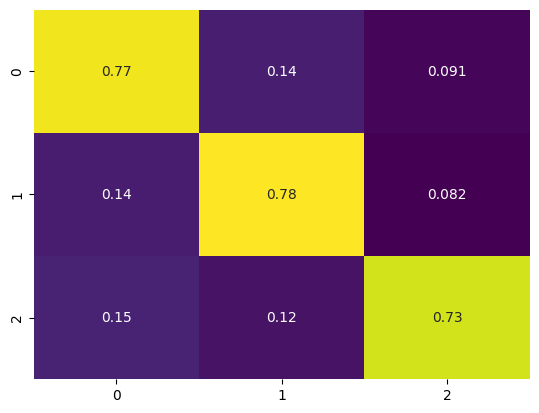

f1 score 0.7615711957489303


In [ ]:
rnn_model = simple_rnn()
checkpoint_path="simple_rnn_model.keras"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)
plot_history(history)
f1 = evaluate_model(rnn_model, y_test_true)
print("f1 score", f1)

In [ ]:
def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

In [ ]:
def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    #The metrics argument should be passed as a list
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
    return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.5199 - loss: 0.9552 - val_accuracy: 0.7843 - val_loss: 0.5574
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 824s 4s/step - accuracy: 0.7930 - loss: 0.5344 - val_accuracy: 0.8043 - val_loss: 0.5203
Epoch 3/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 766s 4s/step - accuracy: 0.8356 - loss: 0.4475 - val_accuracy: 0.8015 - val_loss: 0.5281
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 787s 3s/step - accuracy: 0.8505 - loss: 0.4056 - val_accuracy: 0.8008 - val_loss: 0.5493
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 819s 4s/step - accuracy: 0.8642 - loss: 0.3800 - val_accuracy: 0.7894 - val_loss: 0.5842


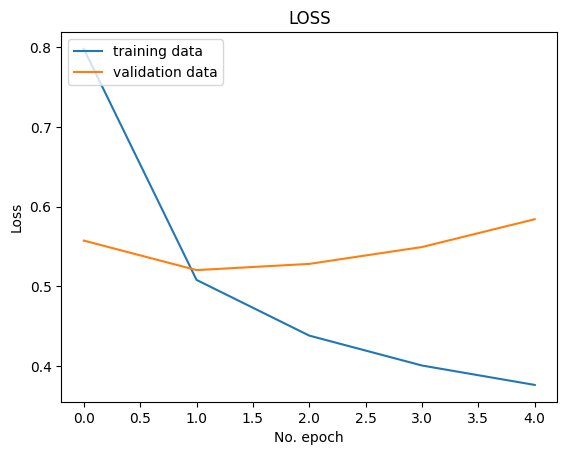

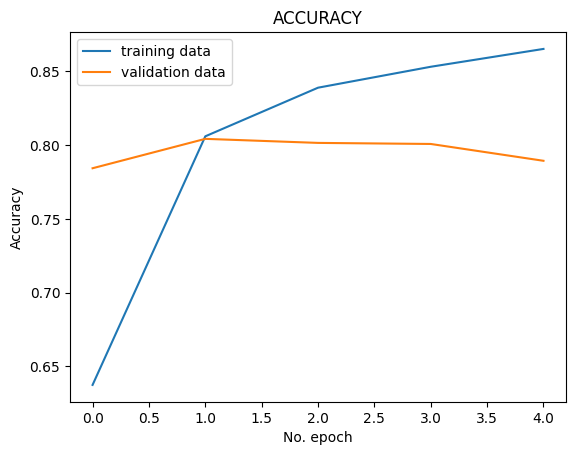

217/217 ━━━━━━━━━━━━━━━━━━━━ 64s 295ms/step
              precision    recall  f1-score   support

           0       0.75      0.87      0.80      2517
           1       0.77      0.76      0.77      2189
           2       0.88      0.72      0.79      2212

    accuracy                           0.79      6918
   macro avg       0.80      0.79      0.79      6918
weighted avg       0.80      0.79      0.79      6918



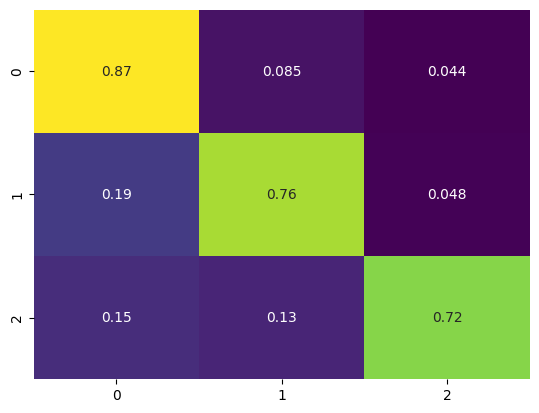

f1 score 0.7882671779114455


In [ ]:
bi_lstm_model = bi_lstm()
checkpoint_path="bi_lstm_model.keras" # Changed the file extension to .keras
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(bi_lstm_model, y_test_true)
print("f1 score", f1)